

# 1. 데이터 전처리 

In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

 #폰트

import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic')  


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import io

In [3]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [4]:
# 데이터 불러오기

df = pd.read_csv(io.StringIO(uploaded['vgames2.csv'].decode('utf-8')))
df = df.drop(df.columns[0], axis=1)
df0 = df

In [5]:
df0

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
...,...,...,...,...,...,...,...,...,...
16593,Ice Age 2: The Meltdown,GC,2006.0,Platform,Vivendi Games,0.15,0.04,0,0.01
16594,Rainbow Islands: Revolution,PSP,2005.0,Action,Rising Star Games,0.01,0,0,0
16595,NBA 2K16,PS3,2015.0,Sports,Take-Two Interactive,0.44,0.19,0.03,0.13
16596,Toukiden: The Age of Demons,PSV,2013.0,Action,Tecmo Koei,0.05,0.05,0.25,0.03


In [6]:
# 결측치 확인

df.isna().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [7]:
# 결측치가 있는 값들은 분석에 있어 제한적이기 때문에 삭제

df.dropna(subset=['Year', 'Genre','Publisher'], inplace=True)
df.reset_index(drop=True, inplace=True)

In [8]:
# 단위를 맞춰주기 위해 0.0K 값은 K를 제거 후 0.001을 곱하고 0.0M 값은 M만 제거
# 문자를 모두 제거했기 때문에 숫자열로 변환

def func(x):  #출고량 형식 통일 함수
  if 'K' in x:
    return str(float(x[:-1])*0.001)
  elif 'M' in x:
    return x[:-1]
  else:
    return x

df['NA_Sales'] = df['NA_Sales'].apply(func)  #func 함수로 출고량 통일
df['EU_Sales'] = df['EU_Sales'].apply(func)
df['JP_Sales'] = df['JP_Sales'].apply(func)
df['Other_Sales'] = df['Other_Sales'].apply(func)

df["NA_Sales"] = pd.to_numeric(df["NA_Sales"])  #출고량 열 숫자열로 변환
df["EU_Sales"] = pd.to_numeric(df["EU_Sales"])
df["JP_Sales"] = pd.to_numeric(df["JP_Sales"])
df["Other_Sales"] = pd.to_numeric(df["Other_Sales"])

In [9]:
# Year 값 같은 서식으로 통일

def func2(x):  #Year 값 처리
  if x < 21:
    return x + 2000
  elif x < 100:
    return x + 1900
  else:
    return x

df['Year'] = df['Year'].apply(func2)

In [10]:
# 'Total_Sales'(출고량 전체 합) column 추가

df_sub = df[['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales']]

df['Total_Sales'] = df_sub.sum(axis=1)

In [11]:
df = df.sort_values(by='Year' ,ascending=True)  #연도순으로 df 재배열
df.reset_index(drop=True, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16241 entries, 0 to 16240
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16241 non-null  object 
 1   Platform     16241 non-null  object 
 2   Year         16241 non-null  float64
 3   Genre        16241 non-null  object 
 4   Publisher    16241 non-null  object 
 5   NA_Sales     16241 non-null  float64
 6   EU_Sales     16241 non-null  float64
 7   JP_Sales     16241 non-null  float64
 8   Other_Sales  16241 non-null  float64
 9   Total_Sales  16241 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.2+ MB


In [13]:
df  #분석에 사용할 데이터프레임 완성

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.00,0.01,0.77
1,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.00,0.05,4.31
2,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.00,0.03,2.76
3,Bridge,2600,1980.0,Misc,Activision,0.25,0.02,0.00,0.00,0.27
4,Freeway,2600,1980.0,Action,Activision,0.32,0.02,0.00,0.00,0.34
...,...,...,...,...,...,...,...,...,...,...
16236,Jikkyou Powerful Pro Baseball 2016,PS3,2016.0,Sports,Konami Digital Entertainment,0.00,0.00,0.11,0.00,0.11
16237,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017.0,Role-Playing,Sega,0.00,0.00,0.03,0.00,0.03
16238,Brothers Conflict: Precious Baby,PSV,2017.0,Action,Idea Factory,0.00,0.00,0.01,0.00,0.01
16239,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017.0,Role-Playing,Sega,0.00,0.00,0.01,0.00,0.01


# 2. 데이터 분석

In [ ]:
asdf = df.groupby('Genre').Total_Sales.mean()
asdf

In [ ]:
df['Platform'].value_counts()  #플랫폼별 개수

In [ ]:
df['Genre'].value_counts()  #장르별 개수

In [ ]:
df['Year'].value_counts()  #연도별 개수

In [ ]:
df['Publisher'].value_counts()  #개발사별 개수

In [19]:
Year_mean = df.groupby('Year').Total_Sales.mean()
Year_mean = Year_mean.reset_index()
Year_mean  #연도별 게임당 출고량 평균

,Year,Total_Sales
0,1980.0,1.360000
1,1981.0,0.775652
2,1982.0,0.802222
3,1983.0,0.988235
4,1984.0,3.596429
5,1985.0,3.853571
6,1986.0,1.765714
7,1987.0,1.356250
8,1988.0,3.147333
9,1989.0,4.320588


In [20]:
df_rank = df.sort_values(by='Total_Sales' ,ascending=False)
df_rank.reset_index(drop=True, inplace=True)

df_rank  #Total_Sales이 높은 순으로 정리

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...
16236,Kikiite Hajimaru: Eigo Kaiwa Training - KikiTore,DS,2008.0,Misc,Benesse,0.00,0.00,0.01,0.00,0.01
16237,Neo Angelique Special,PSP,2008.0,Adventure,Tecmo Koei,0.00,0.00,0.01,0.00,0.01
16238,Red Stone DS: Akaki Ishi ni Michibikareshi Mon...,DS,2011.0,Role-Playing,Unknown,0.00,0.00,0.01,0.00,0.01
16239,Caladrius,X360,2013.0,Shooter,Moss,0.00,0.00,0.01,0.00,0.01


In [21]:
rank10 = df_rank.iloc[0:9,:]

rank10  # 출고량 TOP 10

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61


In [22]:
rank1 = (df_rank.Genre == 'Action')
rank2 = (df_rank.Genre == 'Sports')
rank3 = (df_rank.Genre == 'Shooter')
rank4 = (df_rank.Genre == 'Role-Playing')
rank5 = (df_rank.Genre == 'Platform')

rank_Action = df_rank[rank1].iloc[0:20,:]
rank_Action.reset_index(inplace=True)
rank_Action = rank_Action.iloc[:,1:]

rank_Sports = df_rank[rank2].iloc[0:10,:]
rank_Sports.reset_index(inplace=True)
rank_Sports = rank_Sports.iloc[:,1:]

rank_Shooter = df_rank[rank3].iloc[0:10,:]
rank_Shooter.reset_index(inplace=True)
rank_Shooter = rank_Shooter.iloc[:,1:]

rank_Role_Playing = df_rank[rank4].iloc[0:10,:]
rank_Role_Playing.reset_index(inplace=True)
rank_Role_Playing = rank_Role_Playing.iloc[:,1:]

rank_Platform = df_rank[rank5].iloc[0:10,:]
rank_Platform.reset_index(inplace=True)
rank_Platform = rank_Platform.iloc[:,1:]  # 각 장르별 출고량 탑10 

In [23]:
rank_Action

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
1,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
2,Grand Theft Auto V,X360,2013.0,Action,Take-Two Interactive,9.63,5.31,0.06,1.38,16.38
3,Grand Theft Auto: Vice City,PS2,2002.0,Action,Take-Two Interactive,8.41,5.49,0.47,1.78,16.15
4,Grand Theft Auto III,PS2,2001.0,Action,Take-Two Interactive,6.99,4.51,0.30,1.30,13.10
5,Grand Theft Auto V,PS4,2014.0,Action,Take-Two Interactive,3.80,5.81,0.36,2.02,11.99
6,Pokemon HeartGold/Pokemon SoulSilver,DS,2009.0,Action,Nintendo,4.40,2.77,3.96,0.77,11.90
7,Grand Theft Auto IV,X360,2008.0,Action,Take-Two Interactive,6.76,3.10,0.14,1.03,11.03
8,Grand Theft Auto IV,PS3,2008.0,Action,Take-Two Interactive,4.76,3.76,0.44,1.62,10.58
9,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.05,0.13,2.01,8.25


In [24]:
rank_Sports

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
2,Wii Fit,Wii,2007.0,Sports,Nintendo,8.94,8.03,3.60,2.15,22.72
3,Wii Fit Plus,Wii,2009.0,Sports,Nintendo,9.09,8.59,2.53,1.79,22.00
4,FIFA 16,PS4,2015.0,Sports,Electronic Arts,1.11,6.06,0.06,1.26,8.49
5,Mario & Sonic at the Olympic Games,Wii,2007.0,Sports,Sega,2.58,3.90,0.66,0.91,8.05
6,FIFA 14,PS3,2013.0,Sports,Electronic Arts,0.78,4.32,0.07,1.73,6.90
7,Zumba Fitness,Wii,2010.0,Sports,505 Games,3.50,2.64,0.00,0.67,6.81
8,FIFA 12,PS3,2011.0,Sports,Electronic Arts,0.84,4.32,0.11,1.42,6.69
9,FIFA 15,PS4,2014.0,Sports,Electronic Arts,0.79,4.29,0.05,1.47,6.60


In [25]:
rank_Shooter

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
1,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.03,4.28,0.13,1.32,14.76
2,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.67,3.73,0.11,1.13,14.64
3,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,Activision,5.77,5.81,0.35,2.31,14.24
4,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.88,0.65,2.52,14.04
5,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.30,0.07,1.12,13.74
6,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.63,0.08,1.29,13.52
7,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.82,0.49,1.62,13.47
8,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.98,4.44,0.48,1.83,12.73
9,Halo 3,X360,2007.0,Shooter,Microsoft Game Studios,7.97,2.83,0.13,1.21,12.14


In [26]:
rank_Role_Playing

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
2,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35
3,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.84
4,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
5,Pokémon Yellow: Special Pikachu Edition,GB,1998.0,Role-Playing,Nintendo,5.89,5.04,3.12,0.59,14.64
6,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014.0,Role-Playing,Nintendo,4.23,3.37,3.08,0.65,11.33
7,Pokemon FireRed/Pokemon LeafGreen,GBA,2004.0,Role-Playing,Nintendo,4.34,2.65,3.15,0.35,10.49
8,Final Fantasy VII,PS,1997.0,Role-Playing,Sony Computer Entertainment,3.01,2.47,3.28,0.96,9.72
9,The Elder Scrolls V: Skyrim,X360,2011.0,Role-Playing,Bethesda Softworks,5.03,2.86,0.10,0.85,8.84


In [27]:
rank_Platform

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
1,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
2,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
3,Super Mario World,SNES,1990.0,Platform,Nintendo,12.78,3.75,3.54,0.55,20.62
4,Super Mario Land,GB,1989.0,Platform,Nintendo,10.83,2.71,4.18,0.42,18.14
5,Super Mario Bros. 3,NES,1988.0,Platform,Nintendo,9.54,3.44,3.84,0.46,17.28
6,Super Mario 64,N64,1996.0,Platform,Nintendo,6.91,2.85,1.91,0.23,11.90
7,Super Mario Galaxy,Wii,2007.0,Platform,Nintendo,6.16,3.40,1.20,0.76,11.52
8,Super Mario 3D Land,3DS,2011.0,Platform,Nintendo,4.89,2.99,2.13,0.78,10.79
9,Super Mario All-Stars,SNES,1993.0,Platform,Nintendo,5.99,2.15,2.12,0.29,10.55


# 3. Test

In [28]:
#신뢰구간..?

from scipy import stats
from scipy.stats import t

def confidence_interval(data, confidence = 0.95):   #신뢰구간을 구하는 함수
    
    data = np.array(data)
    mean = np.mean(data)
    n = len(data)

    stderr = stats.sem(data)  #표준오차
    interval = stderr * stats.t.ppf( (1 + confidence) / 2 , n - 1) #신뢰구간

    return (mean - interval, mean + interval)

df_TS = df_rank['Total_Sales']

df_interval = confidence_interval(df_TS)

TS_mean = df['Total_Sales'].mean()

print(TS_mean)
print(df_interval)

0.5390905732405965
(0.5150367358023673, 0.5631444106787609)


In [29]:
# (장르 - 총 출고량) 카이제곱..?

xxx = df.groupby('Genre').Total_Sales.mean()
d = xxx.reset_index()
d.set_index('Genre', inplace = True)

from scipy.stats import chisquare  

chi1 = chisquare(d)


In [30]:
# 차원 축소..?

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
Genre = df['Genre']
Genre.reset_index(drop=True, inplace=True)

scaler = StandardScaler()
features = pd.DataFrame(scaler.fit_transform(features), columns=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])

pca = PCA(n_components=2)  #2차원으로 PCA 실행
extracted_df = pd.DataFrame(pca.fit_transform(features), columns=['PC1', 'PC2'])

extracted_df  #PCA 결과

,PC1,PC2
0,-0.014373,-0.141464
1,2.495664,-0.536213
2,1.394427,-0.359671
3,-0.372765,-0.079234
4,-0.326634,-0.084302
...,...,...
16236,-0.427274,0.263074
16237,-0.523436,0.031906
16238,-0.547477,-0.025886
16239,-0.547477,-0.025886


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


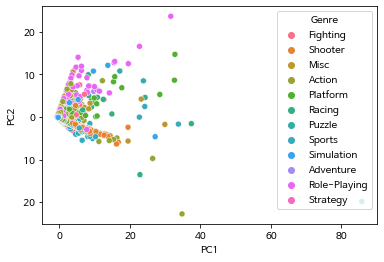

In [31]:
scatterplot = sns.scatterplot(x="PC1", y="PC2", hue=Genre, data=extracted_df)

# 4. 데이터 분석 Graph

In [32]:
df_subset1 = df.groupby('Genre').NA_Sales.sum()
df_subset2 = df.groupby('Genre').EU_Sales.sum()
df_subset3 = df.groupby('Genre').JP_Sales.sum()
df_subset4 = df.groupby('Genre').Other_Sales.sum()
Genre_Sales = pd.concat([df_subset1,df_subset2,df_subset3, df_subset4],axis=1)
Genre_Sales.reset_index(drop=False, inplace=True)

Genre_Sales  #장르 - 나라별 출고량

,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Action,858.75,513.64,156.60,183.99
1,Adventure,101.79,63.66,51.87,16.70
2,Fighting,220.35,99.90,87.14,36.15
3,Misc,394.73,208.15,104.18,72.64
4,Platform,445.38,200.63,130.53,51.45
5,Puzzle,121.58,50.47,56.24,12.44
6,Racing,354.70,235.02,56.32,76.51
7,Role-Playing,318.76,183.09,342.93,56.73
8,Shooter,574.48,310.23,38.18,101.86
9,Simulation,181.43,112.99,63.54,31.32


In [33]:
Genre = Genre_Sales['Genre']
Sales_Sum = Genre_Sales[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum(axis=1)

Genre_Sales_Sum = pd.concat([Genre,Sales_Sum], axis=1)
Genre_Sales_Sum.columns = ['Genre','Sales_Sum']

Genre_Sales_Sum = Genre_Sales_Sum.sort_values(by='Sales_Sum' ,ascending=False)
Genre_Sales_Sum.reset_index(drop=True, inplace=True)

Genre_Sales_Sum   #장르 - 전세계 출고량 합

,Genre,Sales_Sum
0,Action,1712.98
1,Sports,1305.34
2,Shooter,1024.75
3,Role-Playing,901.51
4,Platform,827.99
5,Misc,779.70
6,Racing,722.55
7,Fighting,443.54
8,Simulation,389.28
9,Puzzle,240.73


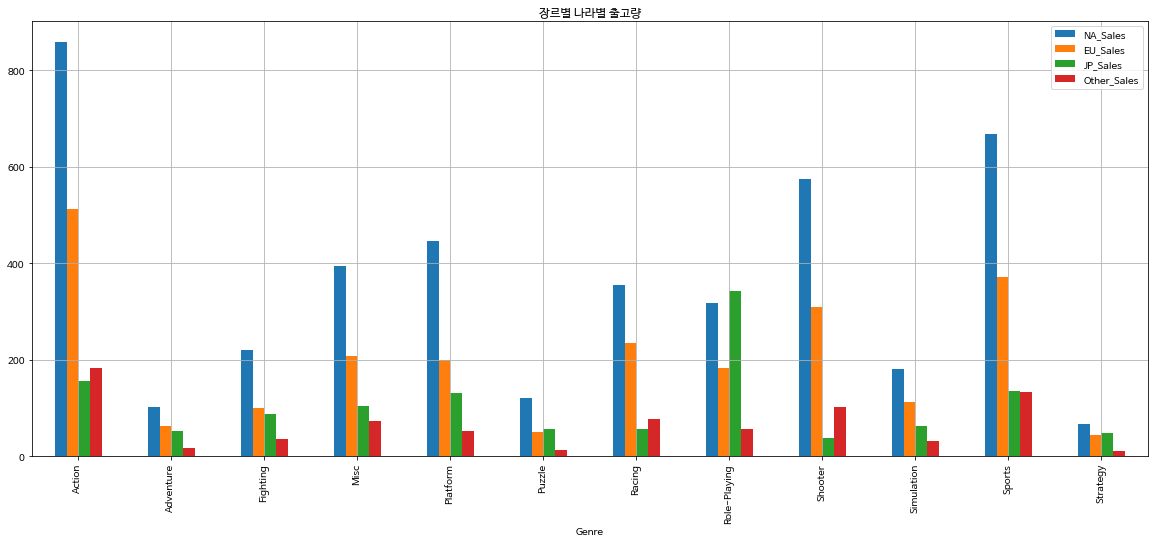

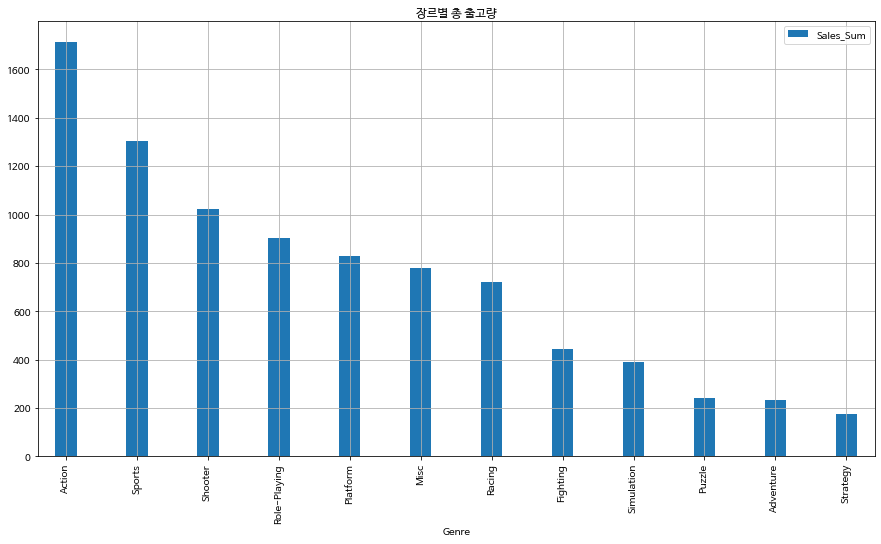

In [34]:
def Genre_Sales_Graph():  #장르별 나라별 출고량 합 그래프
  Genre_Sales.plot(kind ='bar', 
                 x='Genre',
                 title='장르별 나라별 출고량',
                 width=0.5,
                 grid=True,
                 figsize=(20,8))
  plt.show()

def Genre_Sales_Sum_Graph():  #장르별 전세계 출고량 합 그래프
  Genre_Sales_Sum.plot(kind ='bar', 
                 x='Genre',
                 title='장르별 총 출고량',
                 width=0.3,
                 grid=True,
                 figsize=(15,8))
  plt.show()

Genre_Sales_Graph()      #장르 - 나라별 출고량 Graph
Genre_Sales_Sum_Graph()  #장르 - 전세계 출고량 Graph

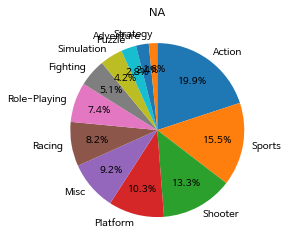

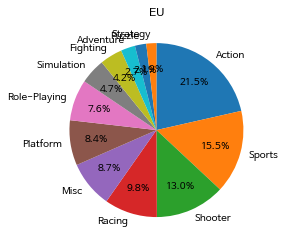

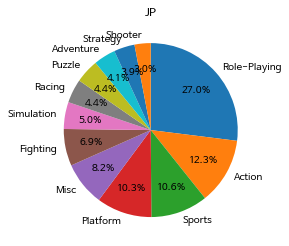

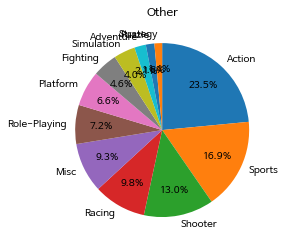

In [35]:
### 지역별 선호 게임 비율 (1. 지역에 따라서 선호하는 게임 장르가 다를까) 

Genre_Sales_NA = Genre_Sales[['Genre','NA_Sales']]
Genre_Sales_NA = Genre_Sales_NA.sort_values(by='NA_Sales', ascending=False)
Genre_Sales_NA.reset_index(drop=True, inplace=True)

def NA_Sales_Graph():  #NA 장르별 출고량 비율 그래프
  plt.pie(Genre_Sales_NA['NA_Sales'],
        labels=Genre_Sales_NA['Genre'],
        startangle=90,
        counterclock=False,
        autopct='%1.1f%%',
        pctdistance=0.7
        )
  plt.title('NA')
  plt.show()


Genre_Sales_EU = Genre_Sales[['Genre','EU_Sales']]
Genre_Sales_EU = Genre_Sales_EU.sort_values(by='EU_Sales', ascending=False)
Genre_Sales_EU.reset_index(drop=True, inplace=True)

def EU_Sales_Graph():  #EU 장르별 출고량 비율 그래프
  plt.pie(Genre_Sales_EU['EU_Sales'],
        labels=Genre_Sales_EU['Genre'],
        startangle=90,
        counterclock=False,
        autopct='%1.1f%%',
        pctdistance=0.7
        )
  plt.title('EU')
  plt.show()


Genre_Sales_JP = Genre_Sales[['Genre','JP_Sales']]
Genre_Sales_JP = Genre_Sales_JP.sort_values(by='JP_Sales', ascending=False)
Genre_Sales_JP.reset_index(drop=True, inplace=True)

def JP_Sales_Graph():  #JP 장르별 출고량 비율 그래프
  plt.pie(Genre_Sales_JP['JP_Sales'],
        labels=Genre_Sales_JP['Genre'],
        startangle=90,
        counterclock=False,
        autopct='%1.1f%%',
        pctdistance=0.7
        )
  plt.title('JP')
  plt.show()


Genre_Sales_Other = Genre_Sales[['Genre','Other_Sales']]
Genre_Sales_Other = Genre_Sales_Other.sort_values(by='Other_Sales', ascending=False)
Genre_Sales_Other.reset_index(drop=True, inplace=True)

def Other_Sales_Graph():  #Other 장르별 출고량 비율 그래프
  plt.pie(Genre_Sales_Other['Other_Sales'],
        labels=Genre_Sales_Other['Genre'],
        startangle=90,
        counterclock=False,
        autopct='%1.1f%%',
        pctdistance=0.7
        )
  plt.title('Other')
  plt.show()


# 장르별 출고량 비율 그래프 (나라별)
NA_Sales_Graph()
EU_Sales_Graph()
JP_Sales_Graph()
Other_Sales_Graph()

In [36]:
# 연도별 게임 트렌드
trend1 = df.groupby('Year').NA_Sales.sum()
trend1 = trend1.reset_index()

trend2 = df.groupby('Year').EU_Sales.sum()
trend2 = trend2.reset_index()

trend3 = df.groupby('Year').JP_Sales.sum()
trend3 = trend3.reset_index()

trend4 = df.groupby('Year').Other_Sales.sum()
trend4 = trend4.reset_index()

Year_Sales = pd.concat([trend1,trend2,trend3,trend4], axis=1)
Year_Sales = Year_Sales.iloc[:,[1,3,5,7]]

Year_Sales  #연도 - 나라별 출고량

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,10.13,0.64,0.00,0.11
1,33.40,1.96,0.00,0.32
2,26.92,1.65,0.00,0.31
3,7.76,0.80,8.10,0.14
4,33.28,2.10,14.27,0.70
5,33.73,4.74,14.56,0.92
6,12.50,2.84,19.81,1.93
7,8.46,1.41,11.63,0.20
8,23.87,6.59,15.76,0.99
9,45.15,8.44,18.36,1.50


In [37]:
t = Year_Sales.corr()
t

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.964071,0.816396,0.954202
EU_Sales,0.964071,1.000000,0.817066,0.962798
JP_Sales,0.816396,0.817066,1.000000,0.750997
Other_Sales,0.954202,0.962798,0.750997,1.000000


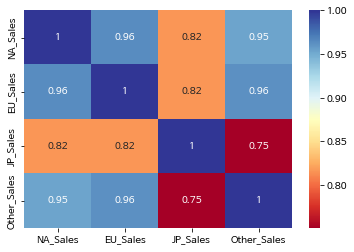

In [38]:
sns.heatmap(t, annot=True, cmap='RdYlBu')

In [ ]:
Year_Sales_Sum = df.groupby('Year').Total_Sales.sum()
Year_Sales_Sum = Year_Sales_Sum.reset_index()

Year_Sales_Sum  #연도 - 전세계 총 출고량

In [40]:
Year_Sales.corr()  #연도별 나라별 게임 출고량 상관관계

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
NA_Sales,1.000000,0.964071,0.816396,0.954202
EU_Sales,0.964071,1.000000,0.817066,0.962798
JP_Sales,0.816396,0.817066,1.000000,0.750997
Other_Sales,0.954202,0.962798,0.750997,1.000000


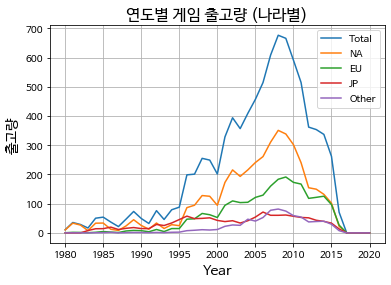

In [41]:
###  연도별 게임의 트렌드가 있을까

def Trend_Graph():  
  plt.plot(Year_Sales_Sum.Year, Year_Sales_Sum.Total_Sales, label='Total')
  plt.plot(trend1.Year, trend1.NA_Sales, label='NA')
  plt.plot(trend2.Year, trend2.EU_Sales, label='EU')
  plt.plot(trend3.Year, trend3.JP_Sales, label='JP')
  plt.plot(trend4.Year, trend4.Other_Sales, label='Other')
  plt.grid(True)
  plt.title('연도별 게임 출고량 (나라별)', fontsize=16)
  plt.xlabel('Year', fontsize=14)
  plt.ylabel('출고량', fontsize=14)
  plt.legend(fontsize=10, loc='best')
  plt.show()

Trend_Graph()  #연도 - 나라별 출고량 Graph

In [42]:
Year_Genre_Num = pd.crosstab(index = df['Year'], columns = df['Genre'])
Year_Genre_Num = Year_Genre_Num.reset_index()
Year_Genre_Num.rename(columns={'Role-Playing':'Role_Playing'},inplace=True)

Year_Genre_Num  #연도 - 장르별 게임 수

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy
0,1980.0,1,0,1,4,0,0,0,0,2,0,0,0
1,1981.0,25,0,0,0,3,2,1,0,10,1,4,0
2,1982.0,18,0,0,1,5,3,2,0,5,0,2,0
3,1983.0,7,1,0,1,5,1,0,0,1,0,1,0
4,1984.0,1,0,0,1,1,3,3,0,3,0,2,0
5,1985.0,2,0,1,0,4,4,0,0,1,1,1,0
6,1986.0,6,0,0,0,6,0,1,1,4,0,3,0
7,1987.0,2,1,2,0,2,0,0,3,2,0,4,0
8,1988.0,2,0,0,0,4,1,1,3,1,1,2,0
9,1989.0,2,0,0,1,3,5,0,2,1,0,3,0


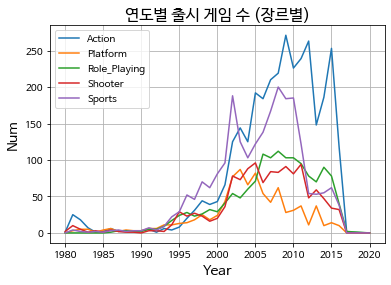

In [43]:
def Trend_Graph2():  
  plt.plot(Year_Genre_Num.Year, Year_Genre_Num.Action, label='Action')
  plt.plot(Year_Genre_Num.Year, Year_Genre_Num.Platform, label='Platform')
  plt.plot(Year_Genre_Num.Year, Year_Genre_Num.Role_Playing, label='Role_Playing')
  plt.plot(Year_Genre_Num.Year, Year_Genre_Num.Shooter, label='Shooter')
  plt.plot(Year_Genre_Num.Year, Year_Genre_Num.Sports, label='Sports')
 
  plt.grid(True)
  plt.title('연도별 출시 게임 수 (장르별)', fontsize=16)
  plt.xlabel('Year', fontsize=14)
  plt.ylabel('Num', fontsize=14)
  plt.legend(fontsize=10, loc='best')
  plt.show()

Trend_Graph2()  #연도 - 장르별 출시 게임 수 Graph

In [44]:
#연도 - 장르별 출고량 Year_Genre_Sales

Year_Genre_Sales = pd.crosstab(index = df['Year'], columns = df['Genre'], values = df['Total_Sales'], aggfunc=np.sum).fillna(0)
Year_Genre_Sales = Year_Genre_Sales.reset_index()
Year_Genre_Sales.rename(columns={'Role-Playing':'Role_Playing'},inplace=True)

Year_Genre_Sales  #연도 - 장르별 출고량 합

Genre,Year,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy
0,1980.0,0.34,0.00,0.77,2.70,0.00,0.00,0.00,0.00,7.07,0.00,0.00,0.00
1,1981.0,14.79,0.00,0.00,0.00,6.92,2.25,0.48,0.00,10.02,0.44,0.78,0.00
2,1982.0,6.50,0.00,0.00,0.87,5.03,10.04,1.57,0.00,3.81,0.00,1.06,0.00
3,1983.0,2.86,0.40,0.00,2.14,6.93,0.78,0.00,0.00,0.49,0.00,3.20,0.00
4,1984.0,1.85,0.00,0.00,1.45,0.69,3.14,5.95,0.00,31.10,0.00,6.17,0.00
5,1985.0,3.52,0.00,1.05,0.00,43.17,3.21,0.00,0.00,1.00,0.04,1.96,0.00
6,1986.0,13.74,0.00,0.00,0.00,9.39,0.00,1.96,2.52,3.89,0.00,5.58,0.00
7,1987.0,1.11,4.38,5.42,0.00,1.74,0.00,0.00,4.65,0.69,0.00,3.71,0.00
8,1988.0,1.74,0.00,0.00,0.00,27.73,5.58,2.14,5.88,0.51,0.03,3.60,0.00
9,1989.0,4.65,0.00,0.00,1.28,20.66,37.75,0.00,2.20,1.19,0.00,5.72,0.00


In [45]:
Year_Genre_Sales_80 = Year_Genre_Sales.iloc[:10,1:].sum()
Year_Genre_Sales_80 = Year_Genre_Sales_80.reset_index()
Year_Genre_Sales_80 = Year_Genre_Sales_80.transpose()
header = Year_Genre_Sales_80.iloc[0]
Year_Genre_Sales_80 = Year_Genre_Sales_80[1:]
Year_Genre_Sales_80.rename(columns=header, inplace=True)
Year_Genre_Sales_80['Year'] = '1980'

Year_Genre_Sales_80

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy,Year
0,51.1,4.78,7.24,8.44,122.26,62.75,12.1,15.25,59.77,0.51,31.78,0.0,1980


In [46]:
Year_Genre_Sales_90 = Year_Genre_Sales.iloc[10:20,1:].sum()
Year_Genre_Sales_90 = Year_Genre_Sales_90.reset_index()
Year_Genre_Sales_90 = Year_Genre_Sales_90.transpose()
header = Year_Genre_Sales_90.iloc[0]
Year_Genre_Sales_90 = Year_Genre_Sales_90[1:]
Year_Genre_Sales_90.rename(columns=header, inplace=True)
Year_Genre_Sales_90['Year'] = '1990'
Year_Genre_Sales_90

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy,Year
0,139.15,44.8,123.51,63.43,208.87,38.94,148.81,182.77,68.89,52.04,146.47,57.51,1990


In [47]:
Year_Genre_Sales_00 = Year_Genre_Sales.iloc[20:30,1:].sum()
Year_Genre_Sales_00 = Year_Genre_Sales_00.reset_index()
Year_Genre_Sales_00 = Year_Genre_Sales_00.transpose()
header = Year_Genre_Sales_00.iloc[0]
Year_Genre_Sales_00 = Year_Genre_Sales_00[1:]
Year_Genre_Sales_00.rename(columns=header, inplace=True)
Year_Genre_Sales_00['Year'] = '2000'
Year_Genre_Sales_00

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy,Year
0,853.13,123.59,231.26,478.53,376.13,117.86,438.0,412.2,433.45,265.64,802.81,79.82,2000


In [48]:
Year_Genre_Sales_10 = Year_Genre_Sales.iloc[30:,1:].sum()
Year_Genre_Sales_10 = Year_Genre_Sales_10.reset_index()
Year_Genre_Sales_10 = Year_Genre_Sales_10.transpose()
header = Year_Genre_Sales_10.iloc[0]
Year_Genre_Sales_10 = Year_Genre_Sales_10[1:]
Year_Genre_Sales_10.rename(columns=header, inplace=True)
Year_Genre_Sales_10['Year'] = '2010'
Year_Genre_Sales_10

,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role_Playing,Shooter,Simulation,Sports,Strategy,Year
0,669.6,60.85,81.53,229.3,120.73,21.18,123.64,291.29,462.64,71.09,324.28,35.65,2010


In [49]:
Year_Genre_Sales_T = pd.concat([Year_Genre_Sales_80,Year_Genre_Sales_90,Year_Genre_Sales_00,Year_Genre_Sales_10])
Year_Genre_Sales_T = Year_Genre_Sales_T[['Year','Action','Sports','Shooter','Role_Playing','Platform']]
Year_Genre_Sales_T  #연대별 장르별 출고량

,Year,Action,Sports,Shooter,Role_Playing,Platform
0,1980,51.1,31.78,59.77,15.25,122.26
0,1990,139.15,146.47,68.89,182.77,208.87
0,2000,853.13,802.81,433.45,412.2,376.13
0,2010,669.6,324.28,462.64,291.29,120.73


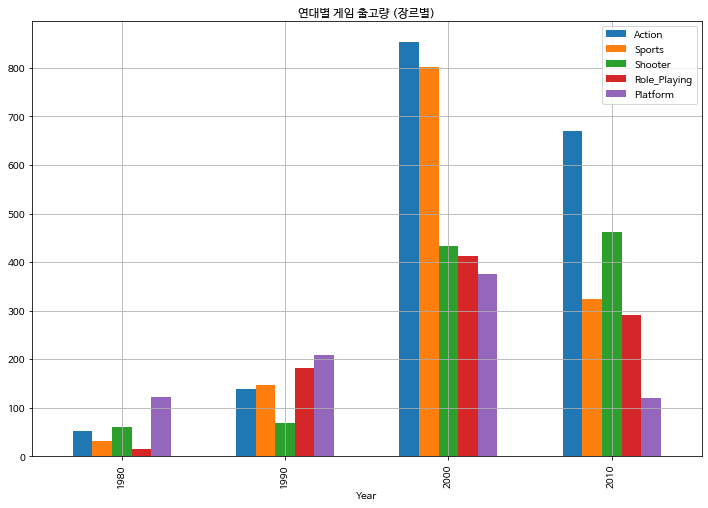

In [62]:
def Trend_Graph33():  #연대별 장르별 출고량
  Year_Genre_Sales_T.plot(kind ='bar', 
                         x='Year',
                         title='연대별 게임 출고량 (장르별)',
                         width=0.6,
                         grid=True,
                         figsize=(12,8))
  plt.show()

Trend_Graph33()

In [ ]:
def Trend_Graph3():  
  plt.plot(Year_Genre_Sales.Year, Year_Genre_Sales.Action, label='Action')
  plt.plot(Year_Genre_Sales.Year, Year_Genre_Sales.Platform, label='Platform')
  plt.plot(Year_Genre_Sales.Year, Year_Genre_Sales.Role_Playing, label='Role_Playing')
  plt.plot(Year_Genre_Sales.Year, Year_Genre_Sales.Shooter, label='Shooter')
  plt.plot(Year_Genre_Sales.Year, Year_Genre_Sales.Sports, label='Sports')
 
  plt.grid(True)
  plt.title('연도별 게임 출고량 (장르별)', fontsize=16)
  plt.xlabel('Year', fontsize=14)
  plt.ylabel('출고량', fontsize=14)
  plt.legend(fontsize=10, loc='best')
  plt.show()

Trend_Graph3()  #연도 - 장르별 출고량 Graph

In [ ]:
condition1 = Year_Genre_Num.iloc[:,0]
condition2 = Year_Genre_Num.iloc[:,1:]
condition3 = condition2.sum(axis=1)
Year_Game_Sum = pd.concat([condition1,condition3],axis=1)
Year_Game_Sum.columns=['Year','number']

Year_Game_Sum  #연도 - 게임 수 총 합

In [ ]:
Num_Sales = pd.concat([Year_Sales_Sum,Year_Game_Sum], axis = 1)
Num_Sales = Num_Sales[['Total_Sales','number']]
Num_Sales  # 연도별 출고량 합, 게임 수 합

In [54]:
corr = Num_Sales.corr()
corr  #출시 게임 수와 총 출고량은 강한 양의 상관관계가 있다.

,Total_Sales,number
Total_Sales,1.000000,0.983534
number,0.983534,1.000000


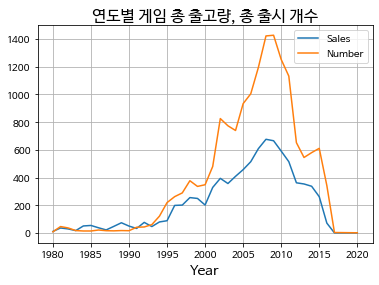

In [63]:
def Trend_Graph4():  
  plt.plot(Year_Sales_Sum.Year, Year_Sales_Sum.Total_Sales, label='Sales')
  plt.plot(Year_Game_Sum.Year, Year_Game_Sum.number, label='Number')
  plt.grid(True)
  plt.title('연도별 게임 총 출고량, 총 출시 개수', fontsize=16)
  plt.xlabel('Year', fontsize=14)
  plt.legend(fontsize=10, loc='best')
  plt.show()

Trend_Graph4()  #연도 - 게임 총 출고량 및 총 게임 개수 Graph

In [56]:
#연도별 장르 count
#연도별 게임 개수 total count

# 5. 데이터 분석 결과


*   장르마다 나라별 출고량
*   나라마다 장르별 출고량 비율
*   연도별 게임 출고량
*   연도별 출시 게임 수
*   연도별 총 출고량 - 출시 개수 상관관계
*   나라간 게임 출고량 상관관계







# 6. 데이터 분석 평가